In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load in 

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# Any results you write to the current directory are saved as output.

/kaggle/input/house-prices-advanced-regression-techniques/train.csv
/kaggle/input/house-prices-advanced-regression-techniques/sample_submission.csv
/kaggle/input/house-prices-advanced-regression-techniques/test.csv
/kaggle/input/house-prices-advanced-regression-techniques/data_description.txt


**1. Read_CSV**
> First Step is to read csv file using pandas and create dataframe. To read csv use the repository provided by kaggle(dataset collections)

In [2]:
import pandas as pd
df=pd.read_csv("/kaggle/input/house-prices-advanced-regression-techniques/train.csv")

> Print the dataframe info and print the 5 records on the head of dataframe

In [3]:
df.info()
print(df.head())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
Id               1460 non-null int64
MSSubClass       1460 non-null int64
MSZoning         1460 non-null object
LotFrontage      1201 non-null float64
LotArea          1460 non-null int64
Street           1460 non-null object
Alley            91 non-null object
LotShape         1460 non-null object
LandContour      1460 non-null object
Utilities        1460 non-null object
LotConfig        1460 non-null object
LandSlope        1460 non-null object
Neighborhood     1460 non-null object
Condition1       1460 non-null object
Condition2       1460 non-null object
BldgType         1460 non-null object
HouseStyle       1460 non-null object
OverallQual      1460 non-null int64
OverallCond      1460 non-null int64
YearBuilt        1460 non-null int64
YearRemodAdd     1460 non-null int64
RoofStyle        1460 non-null object
RoofMatl         1460 non-null object
Exterior1st      1460 non-n

**2. Process Data**
> Now to apply regression model the data need to be clean and numeric value should be in datafame.

In [4]:
df.drop(df.select_dtypes(include='O'),axis=1,inplace=True)

In [5]:
df.head()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
0,1,60,65.0,8450,7,5,2003,2003,196.0,706,...,0,61,0,0,0,0,0,2,2008,208500
1,2,20,80.0,9600,6,8,1976,1976,0.0,978,...,298,0,0,0,0,0,0,5,2007,181500
2,3,60,68.0,11250,7,5,2001,2002,162.0,486,...,0,42,0,0,0,0,0,9,2008,223500
3,4,70,60.0,9550,7,5,1915,1970,0.0,216,...,0,35,272,0,0,0,0,2,2006,140000
4,5,60,84.0,14260,8,5,2000,2000,350.0,655,...,192,84,0,0,0,0,0,12,2008,250000


* Following line just checks the availability of the null values in dataframe. And the to show isnull i used the heatmap()**

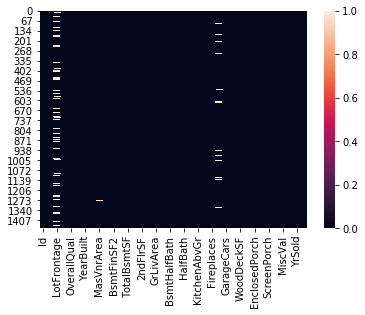

In [6]:
import seaborn as sns
sns.heatmap(df.isnull())

**To preprocess the data is need to be clean and it is done by filling na by the mean values of the columns**

In [7]:
for i in df.columns[df.isnull().any()]:
    df[i].fillna(df[i].mean(),inplace=True)

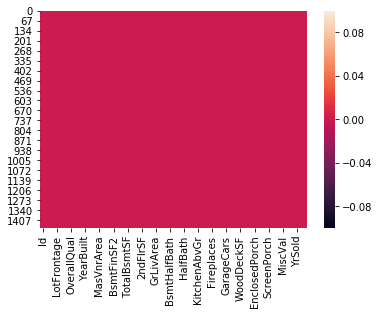

In [8]:
sns.heatmap(df.isnull())

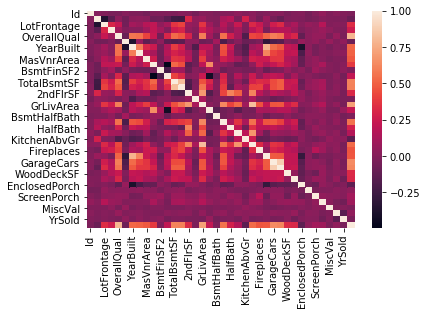

In [9]:
sns.heatmap(df.corr())

* **Following line plots the distplot on saleprice**

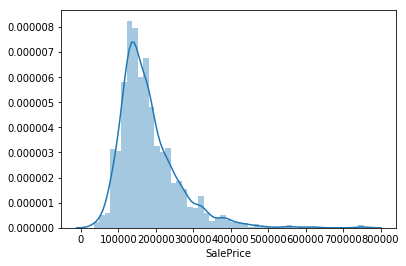

In [10]:
sns.distplot(df['SalePrice'])

**3. Following lines seperates data into training and test dataset to perform opeations**

In [11]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(df.drop('SalePrice',axis=1),df['SalePrice'],test_size=0.3)

**4. After spliting the dataset following lines applies the LinearRegression model on training data**

In [12]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
lr.fit(X_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

**Following lines predicts the test data on basis of model and also plots scatterplot**

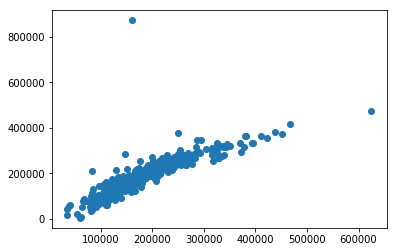

In [13]:
predictions = lr.predict(X_test)
import matplotlib.pyplot as plt
plt.scatter(y_test,predictions)

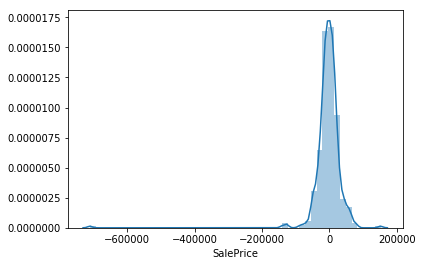

In [14]:
sns.distplot((y_test-predictions),bins=50)

In [15]:
from sklearn import metrics
print('MAE:', metrics.mean_absolute_error(y_test, predictions))
print('MSE:', metrics.mean_squared_error(y_test, predictions))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, predictions)))

MAE: 21472.96425802286
MSE: 1938318412.0462284
RMSE: 44026.33770876506
